 **PART 1** : Data Preparation

1. Load the Iris dataset and perform exploratory data analysis (EDA)

In [1]:
import sklearn.datasets
iris_data = sklearn.datasets.load_iris()

In [2]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
#converting to dataframe
import pandas as pd

In [4]:
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_iris['species_id'] = iris_data.target
df_iris['species'] = df_iris['species_id'].map(lambda x: iris_data.target_names[x])

In [5]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_id species  
0           0  setosa  
1           0  setosa  
2           0  setosa  
3           0  setosa  
4           0  setosa  


In [6]:
print(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_id         150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [7]:
print(df_iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  species_id  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


2. Visualize feature distributions using histograms and pair plots

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

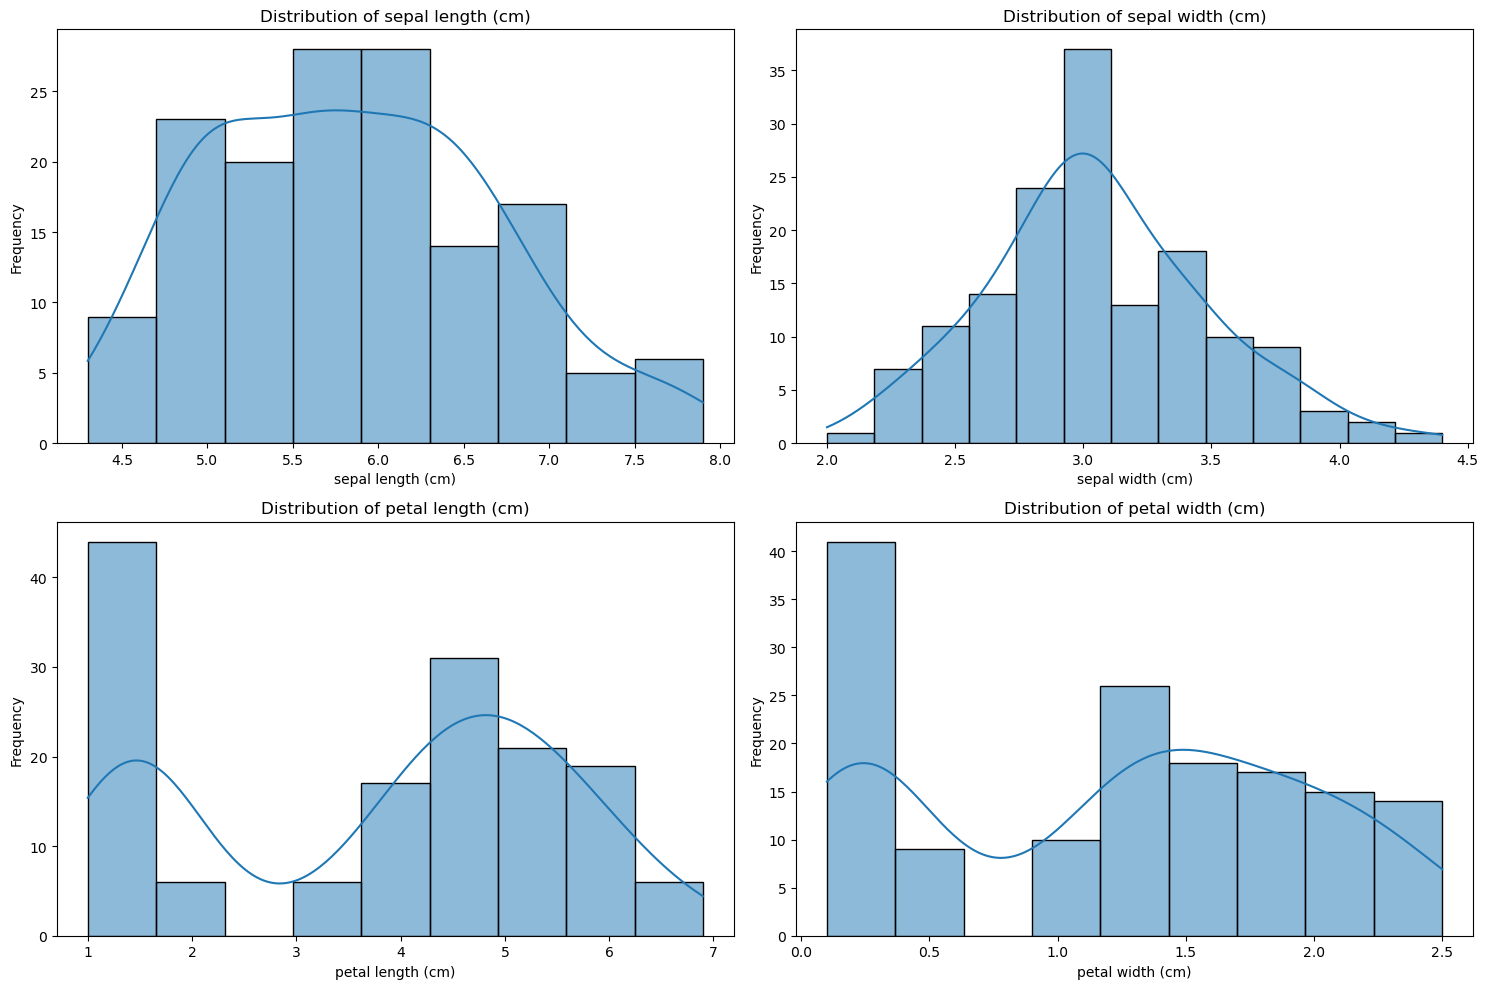

In [9]:
#Histograms of Petal Length, Petal Width, Sepal Length, Sepal Width

numerical_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_iris[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


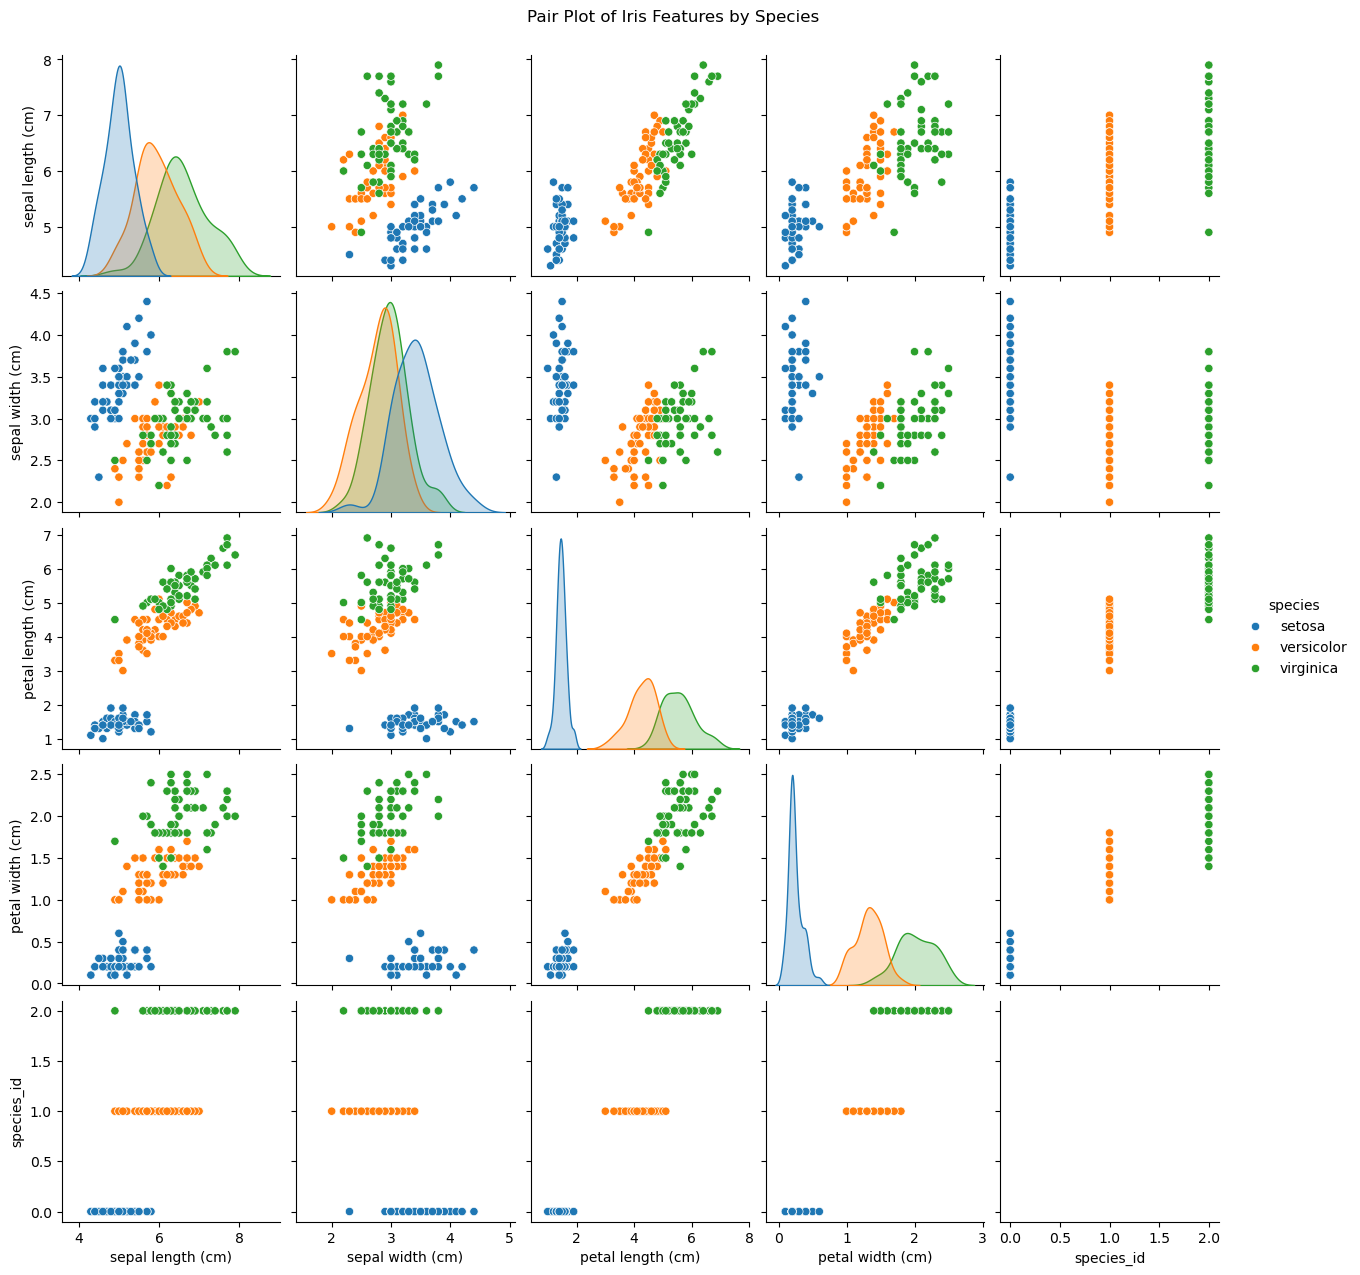

In [10]:
#pair plot, to visualize the relationships between all pairs of features
sns.pairplot(df_iris, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()


3. Split the dataset into training (70%), validation (15%), and test (15%) sets

In [ ]:
# Prepare feature matrix X and target vector y
X = df_iris[numerical_features].values
y = df_iris['species_id'].values

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (150, 4)
Shape of target (y): (150,)


In [ ]:
#splitting the dataset into random training and testing sets

n_samples = X.shape[0]
indices = np.arange(n_samples)
shuffled_indices = np.random.permutation(indices)

print(f"Total number of samples: {n_samples}")
print(f"First 10 shuffled indices: {shuffled_indices[:10]}")

Total number of samples: 150
First 10 shuffled indices: [ 78  68 142  65  38 149  93 103  40  12]


In [13]:
# Defining sizes for training, validation, and test sets
train_size = int(n_samples * 0.7)
val_size = int(n_samples * 0.15)
test_size = n_samples - train_size - val_size # Ensure all samples are accounted for

print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")
print(f"Test set size: {test_size}")

Training set size: 105
Validation set size: 22
Test set size: 23


In [14]:
# Creating the splits
train_indices = shuffled_indices[:train_size]
val_indices = shuffled_indices[train_size:train_size + val_size]
test_indices = shuffled_indices[train_size + val_size:]

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]
X_test, y_test = X[test_indices], y[test_indices]

print("Shapes of the split datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of the split datasets:
X_train shape: (105, 4)
y_train shape: (105,)
X_val shape: (22, 4)
y_val shape: (22,)
X_test shape: (23, 4)
y_test shape: (23,)


4. Normalize/standardize features using z-score normalization using numpy

In [15]:
# Calculate mean and standard deviation for X_train using NumPy
mean_X_train = np.mean(X_train, axis=0)
std_X_train = np.std(X_train, axis=0)

# Apply Z-score normalization to X_train, X_val, and X_test using NumPy
X_train_normalized = (X_train - mean_X_train) / std_X_train
X_val_normalized = (X_val - mean_X_train) / std_X_train
X_test_normalized = (X_test - mean_X_train) / std_X_train


print("First 5 rows of X_train_normalized:\n", X_train_normalized[:5])

First 5 rows of X_train_normalized:
 [[ 0.17243673 -0.41785189  0.42273684  0.38677577]
 [ 0.40757773 -2.14325154  0.42273684  0.38677577]
 [-0.06270427 -0.91082322  0.7615717   0.90411917]
 [ 0.99543022  0.07511944  0.36626436  0.25743993]
 [-1.70869125 -0.17136622 -1.38438246 -1.29459025]]


5. Convert labels to one-hot encoded vectors

In [16]:
# number of unique species
n_classes = len(np.unique(y))
print(f"Number of unique classes: {n_classes}")

Number of unique classes: 3


In [17]:
# One-hot encode y_train
y_train_one_hot = np.eye(n_classes)[y_train]

# One-hot encode y_val
y_val_one_hot = np.eye(n_classes)[y_val]

# One-hot encode y_test
y_test_one_hot = np.eye(n_classes)[y_test]

In [18]:

print("Shapes of one-hot encoded arrays:")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_val_one_hot shape: {y_val_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")


Shapes of one-hot encoded arrays:
y_train_one_hot shape: (105, 3)
y_val_one_hot shape: (22, 3)
y_test_one_hot shape: (23, 3)


## PART 2: Neural Network Implementation (50%)

1. Initialize Network Architecture 

o Input layer: 4 neurons (features)

o Hidden layer 1: 8 neurons with sigmoid activation

o Hidden layer 2: 6 neurons with sigmoid activation

o Output layer: 3 neurons with softmax activation

In [19]:
#Defining the network architecture
input_neurons = 4
hidden1_neurons = 8
hidden2_neurons = 6
output_neurons = 3



2. Implement Core Functions

Initialize_parameters(): Random weight initialization with proper scaling

In [20]:
#Initializing weights and biases
W1 = np.random.randn(input_neurons, hidden1_neurons) * 0.01
b1 = np.zeros((1, hidden1_neurons))
W2 = np.random.randn(hidden1_neurons, hidden2_neurons) * 0.01
b2 = np.zeros((1, hidden2_neurons))
W3 = np.random.randn(hidden2_neurons, output_neurons) * 0.01
b3 = np.zeros((1, output_neurons))

print("Shapes of initialized weights and biases:")
print(f"W1 shape: {W1.shape}")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"b2 shape: {b2.shape}")
print(f"W3 shape: {W3.shape}")
print(f"b3 shape: {b3.shape}")

Shapes of initialized weights and biases:
W1 shape: (4, 8)
b1 shape: (1, 8)
W2 shape: (8, 6)
b2 shape: (1, 6)
W3 shape: (6, 3)
b3 shape: (1, 3)


In [21]:
#defining sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [ ]:

#defining derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)


In [23]:

#defining softmax function
def softmax(x):
    
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)


In [24]:

#defining forward propagation function
def forward_propagation(X, W1, b1, W2, b2, W3, b3):

    # Layer 1: Input to Hidden 1
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)

    # Layer 2: Hidden 1 to Hidden 2
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Layer 3: Hidden 2 to Output
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)

    cache = {"Z1": Z1, "A1": A1,
             "Z2": Z2, "A2": A2,
             "Z3": Z3, "A3": A3}
    return cache


In [25]:

#defining cross-entropy loss function
def compute_loss(y_pred, y_true):
    epsilon = 1e-9
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss


In [26]:

#defining backward propagation function
def backward_propagation(X, y_true, cache, W1, b1, W2, b2, W3, b3):
    
    m = X.shape[0] 

    # Retrieve activations from cache
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]

    # Layer 3 (Output Layer) gradients
    dZ3 = A3 - y_true # Derivative of loss w.r.t Z3 for softmax + cross-entropy
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Layer 2 (Hidden Layer 2) gradients
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Layer 1 (Hidden Layer 1) gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1,
                 "dW2": dW2, "db2": db2,
                 "dW3": dW3, "db3": db3}
    return gradients

In [27]:
#Update parameters function
def update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate):


    W1 -= learning_rate * gradients["dW1"]
    b1 -= learning_rate * gradients["db1"]
    W2 -= learning_rate * gradients["dW2"]
    b2 -= learning_rate * gradients["db2"]
    W3 -= learning_rate * gradients["dW3"]
    b3 -= learning_rate * gradients["db3"]

    return W1, b1, W2, b2, W3, b3



3. Training Loop

o Implement mini-batch gradient descent (batch size: 16)

o Train for 1000 epochs with learning rate = 0.01

o Track and store training loss and validation accuracy every 50 epochs

o Implement early stopping if validation accuracy plateaus

In [28]:
#defining hyperparameters
epochs = 1000
learning_rate = 0.01
batch_size = 16
logging_frequency = 50


In [29]:
#defining accuracy calculation function
def calculate_accuracy(y_pred, y_true):
    # Determine the predicted class (index of the max probability)
    y_pred_class = np.argmax(y_pred, axis=1)
    # Determine the true class (index of the 1 in one-hot encoding)
    y_true_class = np.argmax(y_true, axis=1)

    # Compare predicted and true classes
    correct_predictions = (y_pred_class == y_true_class)

    # Calculate accuracy
    accuracy = np.mean(correct_predictions)
    return accuracy

In [30]:
#mini-batch generator function
def mini_batch_generator(X_data, y_data, batch_size):
    num_samples = X_data.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices) # Shuffle indices in place

    for i in range(0, num_samples, batch_size):
        batch_indices = indices[i:i + batch_size]
        X_batch = X_data[batch_indices]
        y_batch = y_data[batch_indices]
        yield X_batch, y_batch

In [31]:
import numpy as np
arr = np.array([4, 1, 9, 3])
print(np.argmax(arr))


2


In [32]:
# Training loop with mini-batch gradient descent
training_losses = []
training_accuracies = []
validation_accuracies = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct_predictions = 0
    epoch_total_predictions = 0

    # Iterate over mini-batches
    for X_batch, y_batch in mini_batch_generator(X_train_normalized, y_train_one_hot, batch_size):
        # Forward propagation
        cache = forward_propagation(X_batch, W1, b1, W2, b2, W3, b3)
        y_pred_batch = cache["A3"]

        # Compute loss
        loss = compute_loss(y_pred_batch, y_batch)
        epoch_loss += loss

        # Compute training accuracy for batch
        y_pred_class = np.argmax(y_pred_batch, axis=1)
        y_true_class = np.argmax(y_batch, axis=1)
        epoch_correct_predictions += np.sum(y_pred_class == y_true_class)
        epoch_total_predictions += len(y_batch)

        # Backward propagation
        gradients = backward_propagation(X_batch, y_batch, cache, W1, b1, W2, b2, W3, b3)

        # Update parameters
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate)

    # Calculate average epoch loss and accuracy
    avg_epoch_loss = epoch_loss / (len(X_train_normalized) / batch_size)
    avg_epoch_accuracy = epoch_correct_predictions / epoch_total_predictions

    training_losses.append(avg_epoch_loss)
    training_accuracies.append(avg_epoch_accuracy)

    # Log metrics at specified frequency
    if (epoch + 1) % logging_frequency == 0:
        # Calculate validation accuracy
        cache_val = forward_propagation(X_val_normalized, W1, b1, W2, b2, W3, b3)
        y_pred_val = cache_val["A3"]
        val_accuracy = calculate_accuracy(y_pred_val, y_val_one_hot)
        validation_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_epoch_loss:.4f}, Train Accuracy: {avg_epoch_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

print("Training loop completed.")

Epoch 50/1000 - Loss: 1.1714, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 100/1000 - Loss: 1.1715, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 150/1000 - Loss: 1.1719, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 200/1000 - Loss: 1.1716, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 250/1000 - Loss: 1.1724, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 300/1000 - Loss: 1.1725, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 350/1000 - Loss: 1.1720, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 400/1000 - Loss: 1.1736, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 450/1000 - Loss: 1.1725, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 500/1000 - Loss: 1.1728, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 550/1000 - Loss: 1.1724, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 600/1000 - Loss: 1.1725, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 650/1000 - Loss: 1.1733, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 700/100

In [33]:
#implementing the early stopping if learning plateus    
best_val_accuracy = 0
patience = 10 # Number of logging intervals to wait before stopping
patience_counter = 0

best_W1, best_b1, best_W2, best_b2, best_W3, best_b3 = W1, b1, W2, b2, W3, b3

training_losses = []
training_accuracies = []
validation_accuracies = []

for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct_predictions = 0
    epoch_total_predictions = 0

    # Iterate over mini-batches
    for X_batch, y_batch in mini_batch_generator(X_train_normalized, y_train_one_hot, batch_size):
        # Forward propagation
        cache = forward_propagation(X_batch, W1, b1, W2, b2, W3, b3)
        y_pred_batch = cache["A3"]

        # Compute loss
        loss = compute_loss(y_pred_batch, y_batch)
        epoch_loss += loss

        # Compute training accuracy for batch
        y_pred_class = np.argmax(y_pred_batch, axis=1)
        y_true_class = np.argmax(y_batch, axis=1)
        epoch_correct_predictions += np.sum(y_pred_class == y_true_class)
        epoch_total_predictions += len(y_batch)

        # Backward propagation
        gradients = backward_propagation(X_batch, y_batch, cache, W1, b1, W2, b2, W3, b3)

        # Update parameters
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate)

    # Calculate average epoch loss and accuracy
    avg_epoch_loss = epoch_loss / (len(X_train_normalized) / batch_size)
    avg_epoch_accuracy = epoch_correct_predictions / epoch_total_predictions

    training_losses.append(avg_epoch_loss)
    training_accuracies.append(avg_epoch_accuracy)

    # Log metrics at specified frequency
    if (epoch + 1) % logging_frequency == 0:
        # Calculate validation accuracy
        cache_val = forward_propagation(X_val_normalized, W1, b1, W2, b2, W3, b3)
        y_pred_val = cache_val["A3"]
        val_accuracy = calculate_accuracy(y_pred_val, y_val_one_hot)
        validation_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_epoch_loss:.4f}, Train Accuracy: {avg_epoch_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Early stopping logic
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            patience_counter = 0
            # Save best parameters
            best_W1, best_b1, best_W2, best_b2, best_W3, best_b3 = W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy()
        else:
            patience_counter += 1
            print(f"Early stopping patience: {patience_counter}/{patience}")

        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs due to no improvement in validation accuracy.")
            break

print("Training loop completed.")

# Restore best parameters after training
W1, b1, W2, b2, W3, b3 = best_W1, best_b1, best_W2, best_b2, best_W3, best_b3
print("Best model parameters restored.")

Epoch 50/1000 - Loss: 1.1717, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Epoch 100/1000 - Loss: 1.1726, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 1/10
Epoch 150/1000 - Loss: 1.1717, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 2/10
Epoch 200/1000 - Loss: 1.1725, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 3/10
Epoch 250/1000 - Loss: 1.1717, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 4/10
Epoch 300/1000 - Loss: 1.1720, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 5/10
Epoch 350/1000 - Loss: 1.1733, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 6/10
Epoch 400/1000 - Loss: 1.1739, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 7/10
Epoch 450/1000 - Loss: 1.1723, Train Accuracy: 0.3429, Val Accuracy: 0.3636
Early stopping patience: 8/10
Epoch 500/1000 - Loss: 1.1721, Train Accuracy: 0.3429, Val Accuracy: 0.3636
E

Part 3: Evaluation and Analysis (20%)

1. Test the trained model on the test set

In [35]:
print("Evaluating model on the test set...")

# 1. Perform forward propagation on the X_test_normalized dataset
cache_test = forward_propagation(X_test_normalized, best_W1, best_b1, best_W2, best_b2, best_W3, best_b3)
y_pred_test = cache_test["A3"]

# 2. Calculate the loss on the test set
test_loss = compute_loss(y_pred_test, y_test_one_hot)

# 3. Calculate the accuracy on the test set
test_accuracy = calculate_accuracy(y_pred_test, y_test_one_hot)

# 4. Print the calculated test loss and test accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating model on the test set...
Test Loss: 1.1029
Test Accuracy: 0.2609


2. Generate Confusion Matrix and Classification Report

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print("Scikit-learn metrics imported.")

Scikit-learn metrics imported.


In [39]:
y_pred_test_class = np.argmax(y_pred_test, axis=1)
y_true_test_class = np.argmax(y_test_one_hot, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_test_class, y_pred_test_class)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate classification report, setting zero_division to 0 to handle undefined metrics gracefully
class_report = classification_report(y_true_test_class, y_pred_test_class, zero_division=0)
print("\nClassification Report:")
print(class_report)

print("Confusion matrix and classification report generated for the test set.")


Confusion Matrix:
[[0 9 0]
 [0 6 0]
 [0 8 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.26      1.00      0.41         6
           2       0.00      0.00      0.00         8

    accuracy                           0.26        23
   macro avg       0.09      0.33      0.14        23
weighted avg       0.07      0.26      0.11        23

Confusion matrix and classification report generated for the test set.


3.Visualize Decision Boundaries

In [40]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

print("PCA and MLPClassifier imported.")

PCA and MLPClassifier imported.


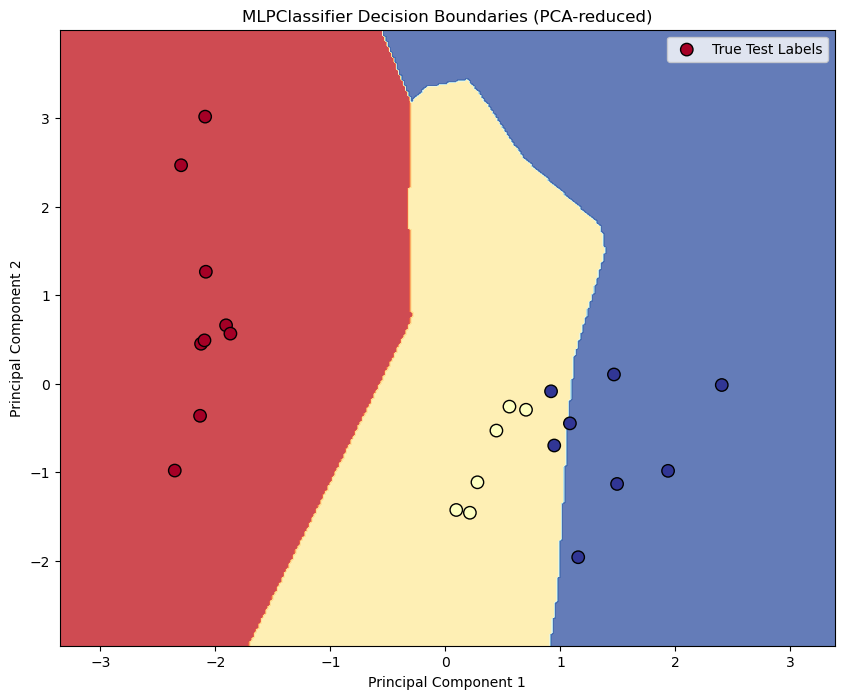

Decision boundaries visualized using PCA and a new MLPClassifier.


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Initialize and train a new MLPClassifier on PCA-reduced data
mlp_pca = MLPClassifier(hidden_layer_sizes=(10,), random_state=42, max_iter=1000)
mlp_pca.fit(X_train_pca, np.argmax(y_train_one_hot, axis=1))

# Create meshgrid for plotting decision boundaries
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = mlp_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot actual test points
plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            c=np.argmax(y_test_one_hot, axis=1),
            cmap=plt.cm.RdYlBu,
            edgecolor='k',
            s=80,
            label='True Test Labels')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MLPClassifier Decision Boundaries (PCA-reduced)')
plt.legend()
plt.show()

print("Decision boundaries visualized using PCA and a new MLPClassifier.")

4. Compare performance with sklearn's MLPClassifier

In [45]:
mlp_sklearn = MLPClassifier(hidden_layer_sizes=(8, 6), random_state=42, max_iter=1000)

# Train the model
# Convert one-hot encoded y_train_one_hot back to class labels for sklearn's fit method
mlp_sklearn.fit(X_train_normalized, np.argmax(y_train_one_hot, axis=1))

# Make predictions on the test set
y_pred_sklearn = mlp_sklearn.predict(X_test_normalized)

# Get true class labels for evaluation
y_true_test_class_sklearn = np.argmax(y_test_one_hot, axis=1)

# Calculate and print accuracy
accuracy_sklearn = mlp_sklearn.score(X_test_normalized, y_true_test_class_sklearn)
print(f"\nMLPClassifier (Scikit-learn) Test Accuracy: {accuracy_sklearn:.4f}")

# Generate and print confusion matrix
conf_matrix_sklearn = confusion_matrix(y_true_test_class_sklearn, y_pred_sklearn)
print("\nMLPClassifier (Scikit-learn) Confusion Matrix:")
print(conf_matrix_sklearn)

# Generate and print classification report
class_report_sklearn = classification_report(y_true_test_class_sklearn, y_pred_sklearn, zero_division=0)
print("\nMLPClassifier (Scikit-learn) Classification Report:")
print(class_report_sklearn)

print("MLPClassifier (Scikit-learn) trained and evaluated.")


MLPClassifier (Scikit-learn) Test Accuracy: 0.9565

MLPClassifier (Scikit-learn) Confusion Matrix:
[[9 0 0]
 [0 6 0]
 [0 1 7]]

MLPClassifier (Scikit-learn) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.86      1.00      0.92         6
           2       1.00      0.88      0.93         8

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.95        23
weighted avg       0.96      0.96      0.96        23

MLPClassifier (Scikit-learn) trained and evaluated.


PART 4: Experimentation

1. Experiment with different learning rates (0.001, 0.01, 0.1)

In [59]:
learning_rates = [0.1, 0.01, 0.001]
activation_functions = ['sigmoid', 'relu', 'tanh']
network_architectures = [(8, 6), (32, 16) , (32,64)]

print(f"Learning Rates to Experiment: {learning_rates}")
print(f"Activation Functions to Experiment: {activation_functions}")
print(f"Network Architectures to Experiment: {network_architectures}")

print("Experiment parameters defined.")

Learning Rates to Experiment: [0.1, 0.01, 0.001]
Activation Functions to Experiment: ['sigmoid', 'relu', 'tanh']
Network Architectures to Experiment: [(8, 6), (32, 16), (32, 64)]
Experiment parameters defined.


In [49]:
#RELU and tanh Activation Functions and Derivatives
def relu(x):
    """Calculates the ReLU activation function."""
    return np.maximum(0, x)

def relu_derivative(x):
    """Calculates the derivative of the ReLU function."""
    return (x > 0).astype(float)

def tanh(x):
    """Calculates the Tanh activation function."""
    return np.tanh(x)

def tanh_derivative(x):
    """Calculates the derivative of the Tanh function given its output tanh(x)."""
    return 1 - np.tanh(x)**2 # Note: this assumes x is the input to tanh, not the output



In [51]:
#definigning and generic neural network where different experimentation can be done
def train_neural_network(X_train, y_train, X_val, y_val,
                         input_neurons, output_neurons,
                         hidden_layer_architecture,
                         activation_function_name,
                         learning_rate, epochs, batch_size, logging_frequency, patience):

    hidden1_neurons, hidden2_neurons = hidden_layer_architecture

    # 1. Initialize weights and biases
    W1 = np.random.randn(input_neurons, hidden1_neurons) * 0.01
    b1 = np.zeros((1, hidden1_neurons))
    W2 = np.random.randn(hidden1_neurons, hidden2_neurons) * 0.01
    b2 = np.zeros((1, hidden2_neurons))
    W3 = np.random.randn(hidden2_neurons, output_neurons) * 0.01
    b3 = np.zeros((1, output_neurons))

    # Select activation functions based on name
    if activation_function_name == 'sigmoid':
        activation = sigmoid
        activation_derivative = sigmoid_derivative
    elif activation_function_name == 'relu':
        activation = relu
        activation_derivative = relu_derivative
    elif activation_function_name == 'tanh':
        activation = tanh
        activation_derivative = tanh_derivative
    else:
        raise ValueError("Unsupported activation function name.")

    best_val_accuracy = 0
    patience_counter = 0
    best_epoch_W1, best_epoch_b1, best_epoch_W2, best_epoch_b2, best_epoch_W3, best_epoch_b3 = \
        W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy()

    training_losses = []
    training_accuracies = []
    validation_accuracies = []
    epochs_run = 0

    for epoch in range(epochs):
        epochs_run = epoch + 1
        epoch_loss = 0
        epoch_correct_predictions = 0
        epoch_total_predictions = 0

        # Iterate over mini-batches
        for X_batch, y_batch in mini_batch_generator(X_train, y_train, batch_size):

            # Modify forward_propagation to use dynamic activation
            Z1 = np.dot(X_batch, W1) + b1
            A1 = activation(Z1)

            Z2 = np.dot(A1, W2) + b2
            A2 = activation(Z2)

            Z3 = np.dot(A2, W3) + b3
            A3 = softmax(Z3)

            cache = {"Z1": Z1, "A1": A1,
                     "Z2": Z2, "A2": A2,
                     "Z3": Z3, "A3": A3}

            # Compute loss
            loss = compute_loss(A3, y_batch)
            epoch_loss += loss

            # Compute training accuracy for batch
            y_pred_class = np.argmax(A3, axis=1)
            y_true_class = np.argmax(y_batch, axis=1)
            epoch_correct_predictions += np.sum(y_pred_class == y_true_class)
            epoch_total_predictions += len(y_batch)

            # Modify backward_propagation to use dynamic activation derivative
            m = X_batch.shape[0]
            dZ3 = A3 - y_batch
            dW3 = np.dot(A2.T, dZ3) / m
            db3 = np.sum(dZ3, axis=0, keepdims=True) / m

            dA2 = np.dot(dZ3, W3.T)
            dZ2 = dA2 * activation_derivative(A2)
            dW2 = np.dot(A1.T, dZ2) / m
            db2 = np.sum(dZ2, axis=0, keepdims=True) / m

            dA1 = np.dot(dZ2, W2.T)
            dZ1 = dA1 * activation_derivative(A1)
            dW1 = np.dot(X_batch.T, dZ1) / m
            db1 = np.sum(dZ1, axis=0, keepdims=True) / m

            gradients = {"dW1": dW1, "db1": db1,
                         "dW2": dW2, "db2": db2,
                         "dW3": dW3, "db3": db3}

            # Update parameters
            W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, gradients, learning_rate)

        # Calculate average epoch loss and accuracy
        avg_epoch_loss = epoch_loss / (len(X_train) / batch_size)
        avg_epoch_accuracy = epoch_correct_predictions / epoch_total_predictions

        training_losses.append(avg_epoch_loss)
        training_accuracies.append(avg_epoch_accuracy)

        # Log metrics at specified frequency and perform early stopping
        if (epoch + 1) % logging_frequency == 0:
            # Calculate validation accuracy (using selected hidden activation function)
            Z1_val = np.dot(X_val, W1) + b1
            A1_val = activation(Z1_val)

            Z2_val = np.dot(A1_val, W2) + b2
            A2_val = activation(Z2_val)

            Z3_val = np.dot(A2_val, W3) + b3
            A3_val = softmax(Z3_val)

            val_accuracy = calculate_accuracy(A3_val, y_val)
            validation_accuracies.append(val_accuracy)

            print(f"  Epoch {epoch + 1}/{epochs} - Loss: {avg_epoch_loss:.4f}, Train Accuracy: {avg_epoch_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

            # Early stopping logic
            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                patience_counter = 0
                # Save best parameters
                best_epoch_W1, best_epoch_b1, best_epoch_W2, best_epoch_b2, best_epoch_W3, best_epoch_b3 = \
                    W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy()
            else:
                patience_counter += 1
                # print(f"  Early stopping patience: {patience_counter}/{patience}")

            if patience_counter >= patience:
                print(f"  Early stopping triggered after {epoch + 1} epochs due to no improvement in validation accuracy.")
                break

    print("Training loop completed.")

    return {
        'W1': best_epoch_W1, 'b1': best_epoch_b1,
        'W2': best_epoch_W2, 'b2': best_epoch_b2,
        'W3': best_epoch_W3, 'b3': best_epoch_b3,
        'training_losses': training_losses,
        'training_accuracies': training_accuracies,
        'validation_accuracies': validation_accuracies,
        'best_val_accuracy': best_val_accuracy,
        'epochs_run': epochs_run
    }

print("Generic training function `train_neural_network` defined.")


Generic training function `train_neural_network` defined.


In [60]:
#trying out different hyperparametrs and architectures
experiment_results = []

# Define fixed parameters for the experimentation loop
# These were defined in previous steps, ensuring consistency across experiments
# input_neurons = input_neurons
# output_neurons = output_neurons
# epochs = epochs
# batch_size = batch_size
# logging_frequency = logging_frequency
# patience = patience

print("Starting experimentation loop...")

for lr in learning_rates:
    for act_fn_name in activation_functions:
        for arch in network_architectures:
            print(f"\nRunning experiment with: LR={lr}, Act_Fn={act_fn_name}, Arch={arch}")

            # Train the neural network with current configuration
            results = train_neural_network(X_train=X_train_normalized,
                                           y_train=y_train_one_hot,
                                           X_val=X_val_normalized,
                                           y_val=y_val_one_hot,
                                           input_neurons=input_neurons,
                                           output_neurons=output_neurons,
                                           hidden_layer_architecture=arch,
                                           activation_function_name=act_fn_name,
                                           learning_rate=lr,
                                           epochs=epochs,
                                           batch_size=batch_size,
                                           logging_frequency=logging_frequency,
                                           patience=patience)

            # Extract best parameters from the trained model
            best_W1, best_b1, best_W2, best_b2, best_W3, best_b3 = \
                results['W1'], results['b1'], results['W2'], results['b2'], results['W3'], results['b3']

            # Evaluate on the test set using the best parameters
            cache_test_exp = forward_propagation(X_test_normalized, best_W1, best_b1, best_W2, best_b2, best_W3, best_b3)
            y_pred_test_exp = cache_test_exp["A3"]

            test_loss = compute_loss(y_pred_test_exp, y_test_one_hot)
            test_accuracy = calculate_accuracy(y_pred_test_exp, y_test_one_hot)

            print(f"  Experiment Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

            # Store results
            experiment_results.append({
                'learning_rate': lr,
                'activation_function': act_fn_name,
                'architecture': arch,
                'best_val_accuracy': results['best_val_accuracy'],
                'test_accuracy': test_accuracy,
                'epochs_run': results['epochs_run'],
                'best_W1': best_W1, 'best_b1': best_b1,
                'best_W2': best_W2, 'best_b2': best_b2,
                'best_W3': best_W3, 'best_b3': best_b3
            })

print("Experimentation phase completed. Results stored in 'experiment_results'.")

Starting experimentation loop...

Running experiment with: LR=0.1, Act_Fn=sigmoid, Arch=(8, 6)
  Epoch 50/1000 - Loss: 1.1773, Train Accuracy: 0.3048, Val Accuracy: 0.3636
  Epoch 100/1000 - Loss: 1.1759, Train Accuracy: 0.3238, Val Accuracy: 0.3636
  Epoch 150/1000 - Loss: 1.1759, Train Accuracy: 0.3429, Val Accuracy: 0.3636
  Epoch 200/1000 - Loss: 1.1746, Train Accuracy: 0.2857, Val Accuracy: 0.3636
  Epoch 250/1000 - Loss: 1.1763, Train Accuracy: 0.2952, Val Accuracy: 0.2727
  Epoch 300/1000 - Loss: 1.1805, Train Accuracy: 0.3048, Val Accuracy: 0.3636
  Epoch 350/1000 - Loss: 1.1783, Train Accuracy: 0.3429, Val Accuracy: 0.2727
  Epoch 400/1000 - Loss: 1.1770, Train Accuracy: 0.3429, Val Accuracy: 0.2727
  Epoch 450/1000 - Loss: 1.1816, Train Accuracy: 0.2190, Val Accuracy: 0.2727
  Epoch 500/1000 - Loss: 1.1762, Train Accuracy: 0.3333, Val Accuracy: 0.3636
  Epoch 550/1000 - Loss: 1.1740, Train Accuracy: 0.3429, Val Accuracy: 0.3636
  Early stopping triggered after 550 epochs due 

In [61]:
#different results comparisions
df_experiment_results = pd.DataFrame(experiment_results)

# Drop the 'best_W' and 'best_b' columns for cleaner display, as they contain large NumPy arrays
df_experiment_results_display = df_experiment_results.drop(columns=['best_W1', 'best_b1', 'best_W2', 'best_b2', 'best_W3', 'best_b3'])

print("Experimentation Results Table:")
print(df_experiment_results_display)

# Identify the best performing model based on test accuracy
best_run = df_experiment_results.loc[df_experiment_results['test_accuracy'].idxmax()]

print("\nBest performing configuration based on Test Accuracy:")
print(best_run.drop(labels=['best_W1', 'best_b1', 'best_W2', 'best_b2', 'best_W3', 'best_b3']))

Experimentation Results Table:
    learning_rate activation_function architecture  best_val_accuracy  \
0           0.100             sigmoid       (8, 6)           0.363636   
1           0.100             sigmoid     (32, 16)           1.000000   
2           0.100             sigmoid     (32, 64)           0.954545   
3           0.100                relu       (8, 6)           0.954545   
4           0.100                relu     (32, 16)           0.954545   
5           0.100                relu     (32, 64)           0.954545   
6           0.100                tanh       (8, 6)           0.954545   
7           0.100                tanh     (32, 16)           0.954545   
8           0.100                tanh     (32, 64)           0.954545   
9           0.010             sigmoid       (8, 6)           0.363636   
10          0.010             sigmoid     (32, 16)           0.363636   
11          0.010             sigmoid     (32, 64)           0.363636   
12          0.010   

Key take aways

1. higher learning rate (0.01) was showing better results compared to lower rate (0.001)
2. Tanh activation function works better than sigmoid activation function. Relu and Tanh showed comparable results while sometimes tanh showed better results
3. large networks gives better results than smaller ones. but bigger networks does not mean linear increase in accuracy. 